# U.S. Oil and Gas Production Analysis

Analyzing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib

# Gas Dataset

In [2]:
file = "data/U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")

print(f"""

{gas_df.shape = }

{gas_df.columns = }

{gas_df.info() = }

""")

gas_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Month                             121 non-null    object
 1   U.S.                              121 non-null    int64 
 2   Alaska                            121 non-null    int64 
 3   Arkansas                          121 non-null    int64 
 4   Kansas                            121 non-null    int64 
 5   Other States                      121 non-null    int64 
 6   Federal Offshore--Gulf of Mexico  121 non-null    int64 
 7   Wyoming                           121 non-null    int64 
 8   West Virginia                     121 non-null    int64 
 9   Utah                              121 non-null    int64 
 10  Pennsylvania                      121 non-null    int64 
 11  Texas                             121 non-null    int64 
 12  Oklahoma              

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,06/01/08,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,07/01/08,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,08/01/08,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


## Converting the Month column to datetime

In [3]:
gas_df['Month'] = pd.to_datetime(gas_df['Month'], dayfirst=True)

print(f"""
{gas_df.info() = }
""")

#gas_df.head(3)
# gas_df.iloc[0:3:1]
gas_df.loc[0:2:1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Month                             121 non-null    datetime64[ns]
 1   U.S.                              121 non-null    int64         
 2   Alaska                            121 non-null    int64         
 3   Arkansas                          121 non-null    int64         
 4   Kansas                            121 non-null    int64         
 5   Other States                      121 non-null    int64         
 6   Federal Offshore--Gulf of Mexico  121 non-null    int64         
 7   Wyoming                           121 non-null    int64         
 8   West Virginia                     121 non-null    int64         
 9   Utah                              121 non-null    int64         
 10  Pennsylvania                      121 non-null    

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-01-06,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-01-07,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-01-08,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [4]:
display(gas_df['Month'].dt.year.head())
display(gas_df['Month'].dt.month.tail())
display(gas_df['Month'].dt.day.head())

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Month, dtype: int64

116    1
117    1
118    1
119    1
120    1
Name: Month, dtype: int64

0     6
1     7
2     8
3     9
4    10
Name: Month, dtype: int64

## Yearly Gas production
How much gas has been produced yearly by each US state, and by the US as a whole?

In [5]:
yearly_gas_df = gas_df.groupby(gas_df['Month'].dt.year).sum()
yearly_gas_df.index.names = ['year']
yearly_gas_df.head()

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
year,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092


In [6]:
ndex_year = yearly_gas_df.index[0]
yearly_gas_shape = yearly_gas_df.shape
us_total = yearly_gas_df.iloc[0:1:, 0:2]

print(f"""
{ndex_year = }

{yearly_gas_shape = }

{us_total}
"""
)


ndex_year = 2008

yearly_gas_shape = (11, 19)

        U.S.  Alaska
year                
2008  489473   64732



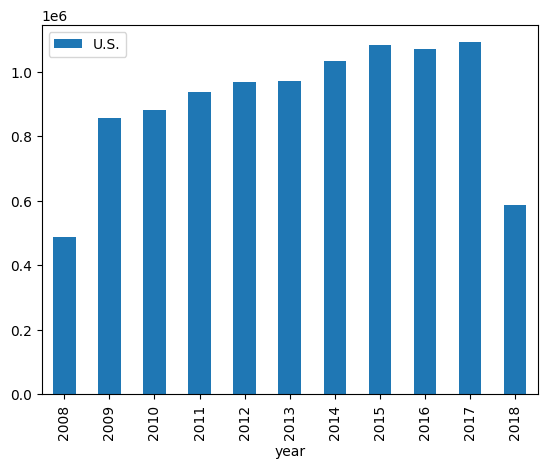

In [7]:
plot = yearly_gas_df.filter(items=['U.S.']).plot(kind="bar")

## State Production

In the previous section, we saw that the production data is not complete for the year 2008 and 2018 (we have only half of the year). We’d like to continue working with full years, meaning we need to discard the first and last rows of yearly_gas_df based on the year.

Create a new dataframe called filtered_yearly_gas_df consisting of only the years that had all the 12 months of production reported.

In [8]:
full_years = np.logical_and(yearly_gas_df.index >= 2009, yearly_gas_df.index <= 2017)
display(full_years)

filtered_yearly_gas_df = yearly_gas_df[full_years]
filtered_yearly_gas_df.head()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
year,,,,,,,,,,,,,,,,,,,
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296


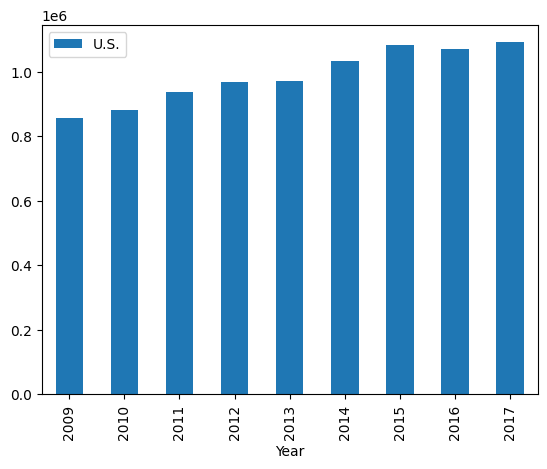

In [9]:
plot = filtered_yearly_gas_df.filter(items=['U.S.']).plot(kind="bar")
plot.set_xlabel("Year");

Let's have a look at the yearly production of some specific states

In [10]:
columns = filtered_yearly_gas_df.columns

print(f"""
{columns[1::].sort_values() = }
{len(columns[1::]) = }
""")


columns[1::].sort_values() = Index(['Alaska', 'Arkansas', 'California', 'Colorado',
       'Federal Offshore--Gulf of Mexico', 'Kansas', 'Louisiana', 'Montana',
       'New Mexico', 'North Dakota', 'Ohio', 'Oklahoma', 'Other States',
       'Pennsylvania', 'Texas', 'Utah', 'West Virginia', 'Wyoming'],
      dtype='object')
len(columns[1::]) = 18



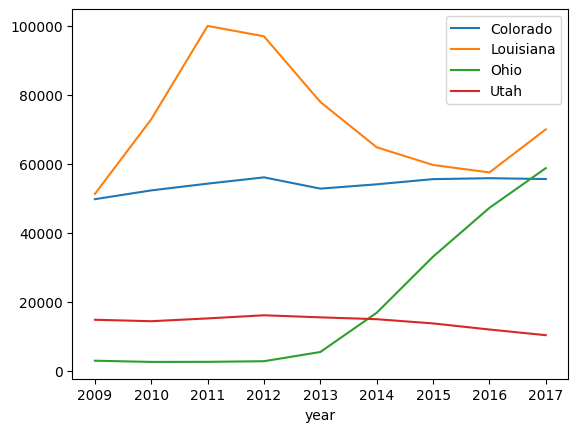

In [11]:
plot = filtered_yearly_gas_df.filter(items=['Colorado', 'Louisiana', 'Ohio', 'Utah']).plot()

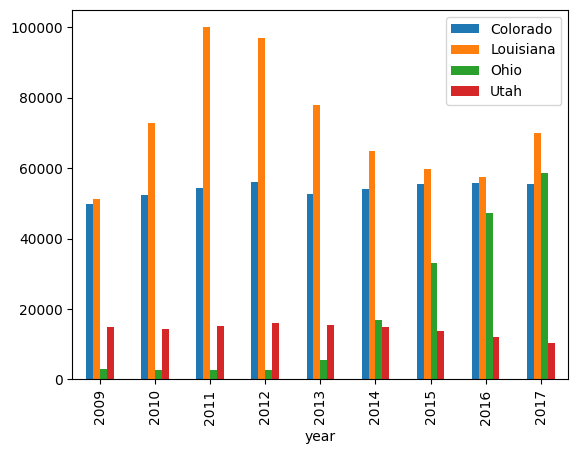

In [12]:
plot = filtered_yearly_gas_df.filter(items=['Colorado', 'Louisiana', 'Ohio', 'Utah']).plot(kind="bar")

# Oil Dataset

In [13]:
file = "data/U.S._crude_oil_production.csv"
oil_df = pd.read_csv(file, parse_dates=['Month'])
print(oil_df.info())
oil_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Month                                      121 non-null    datetime64[ns]
 1   U.S. Crude Oil                             121 non-null    int64         
 2   Alabama                                    121 non-null    int64         
 3   Alaska                                     121 non-null    int64         
 4   Arkansas                                   121 non-null    int64         
 5   Arizona                                    121 non-null    int64         
 6   California                                 121 non-null    int64         
 7   Colorado                                   121 non-null    int64         
 8   Federal Offshore Gulf of Mexico Crude Oil  121 non-null    int64         
 9   Federal Offshore Paci

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1
3,2008-09-01,3974,21,681,16,0,587,88,242,67,...,14,186,8,5,144,6,0,63,1055,1
4,2008-10-01,4738,21,716,17,0,586,86,803,66,...,14,185,8,5,145,6,0,64,1125,1


## Yearly oil production
How much oil has been produced yearly by each US state, and by the US as a whole?

In [14]:
yearly_oil_df = oil_df.groupby(oil_df['Month'].dt.year).sum()
yearly_oil_df.index.names = ['year']
display(yearly_oil_df.columns)
yearly_oil_df.columns = yearly_oil_df.columns.str.strip()
display(yearly_oil_df.columns)


yearly_oil_df.head()

Index(['U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'Arizona',
       'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Virginia', 'Utah', 'Texas', 'Tennessee'],
      dtype='object')

Index(['U.S. Crude Oil', 'Alabama', 'Alaska', 'Arkansas', 'Arizona',
       'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Virginia', 'Utah', 'Texas', 'Tennessee'],
      dtype='object')

,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,Florida,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
year,,,,,,,,,,,,,,,,,,,,,
2008,34211,149,4666,118,0,4095,589,7302,465,37,...,98,1286,56,35,1013,39,0,438,7773,7
2009,64180,236,7749,189,0,6815,998,18727,734,24,...,156,2144,96,55,1695,48,0,757,13132,12
2010,65741,234,7199,189,0,6588,1086,18640,713,56,...,156,2239,108,53,1771,59,0,809,14026,12
2011,67829,275,6742,195,0,6449,1295,15805,652,67,...,156,2534,114,53,1795,72,0,864,17393,12
2012,78007,312,6310,214,0,6465,1626,15189,580,71,...,168,3095,144,60,1900,85,0,991,23742,12


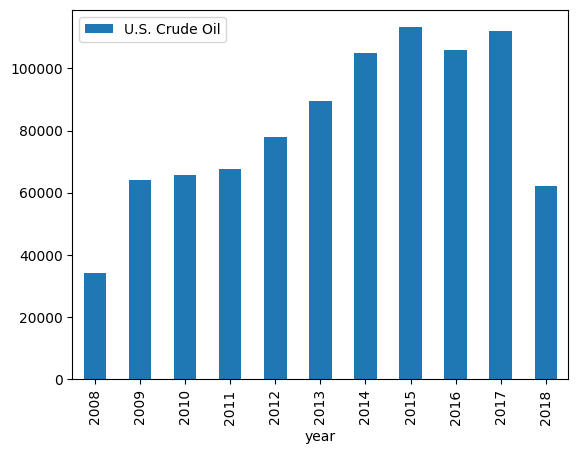

In [15]:
yearly_oil_df.filter(items=['U.S. Crude Oil']).plot(kind='bar');

In [16]:
full_years = np.logical_and(yearly_oil_df.index >= 2009, yearly_gas_df.index <= 2017)
display(full_years)

filtered_yearly_oil_df = yearly_oil_df[full_years]
filtered_yearly_oil_df.head()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,Florida,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
year,,,,,,,,,,,,,,,,,,,,,
2009,64180,236,7749,189,0,6815,998,18727,734,24,...,156,2144,96,55,1695,48,0,757,13132,12
2010,65741,234,7199,189,0,6588,1086,18640,713,56,...,156,2239,108,53,1771,59,0,809,14026,12
2011,67829,275,6742,195,0,6449,1295,15805,652,67,...,156,2534,114,53,1795,72,0,864,17393,12
2012,78007,312,6310,214,0,6465,1626,15189,580,71,...,168,3095,144,60,1900,85,0,991,23742,12
2013,89585,342,6182,218,0,6540,2175,15068,610,72,...,264,3786,174,60,2088,237,0,1152,30475,12


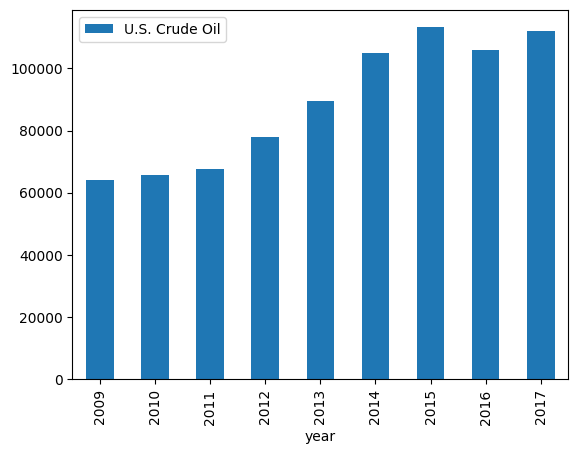

In [17]:
filtered_yearly_oil_df.filter(items=['U.S. Crude Oil']).plot(kind='bar');

# Merging Oil and Gas Datasets 

In [18]:
total_gas = filtered_yearly_gas_df.filter(items=['U.S.'])
total_gas.columns = [ 'Gas' ]
display(total_gas)



total_oil = filtered_yearly_oil_df.filter(items=['U.S. Crude Oil'])
total_oil.columns = [ 'Crude Oil' ]
total_oil

,Gas
year,
2009,856876
2010,881622
2011,936163
2012,968632
2013,970617
2014,1032439
2015,1082158
2016,1070085
2017,1090730


,Crude Oil
year,
2009,64180
2010,65741
2011,67829
2012,78007
2013,89585
2014,105064
2015,113179
2016,105970
2017,112205


In [19]:
merged_df = pd.concat([total_oil, total_gas], axis=1, join='outer')
merged_df

,Crude Oil,Gas
year,,
2009,64180,856876
2010,65741,881622
2011,67829,936163
2012,78007,968632
2013,89585,970617
2014,105064,1032439
2015,113179,1082158
2016,105970,1070085
2017,112205,1090730


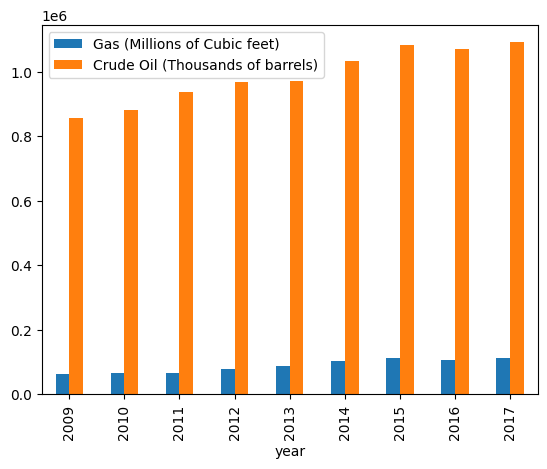

In [20]:
plot = merged_df.plot(kind="bar")
plot.legend(['Gas (Millions of Cubic feet)', 'Crude Oil (Thousands of barrels)']);